In [1]:
from importlib.machinery import SourceFileLoader
import pdb
import matplotlib.pyplot as plt
from time import sleep
from tqdm.notebook import tqdm_notebook
import numpy as np
from copy import copy
import pdb

In [2]:
plt.style.use('default')
plt.rc('figure', figsize = (15,8))
plt.rc('axes', labelsize=24)
plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)

In [3]:
def init():
    Hext = 0;      # el campo externo 
    J = 1;         # la constante de interacción. 
    # rango y sampleo de temperaturas:
    
    kTmax=10; kTmin=kTmax/6; dkT = (kTmax-kTmin)/50; 
    kT=np.linspace(kTmax,kTmin,int((kTmax-kTmin)/dkT));
    return Hext,J,kT 


# Comienzo a hacer los cambios

In [4]:
ising = SourceFileLoader('ising','_ISING.py').load_module().ising

In [5]:
result={}

In [6]:
[Hext,J,kT]=init()
beta = 1/kT
MCsteps = [5e4]#, 1e5]
result = {2:{}} #, 4:{}}#, 8:{}, 16: {}}
for N, thisresult in result.items():
    for thismcsteps in MCsteps:
        thisresult[thismcsteps] = ising(int(thismcsteps), N,Hext,kT,J)

N = 2, totalflips = 50000, KT = 10.0, flips = 50000, rejects = 0
N = 2, totalflips = 50000, KT = 9.829931972789115, flips = 50000, rejects = 0
N = 2, totalflips = 50000, KT = 9.65986394557823, flips = 50000, rejects = 0
N = 2, totalflips = 50000, KT = 9.489795918367347, flips = 50000, rejects = 0
N = 2, totalflips = 50000, KT = 9.319727891156463, flips = 50000, rejects = 0


KeyboardInterrupt: 

### Soluciones teóricas para 2x2:

In [23]:
Z = 2*np.exp(8*beta*J) + 12 + 2*np.exp(-8*beta*J)
Emean = -(1/Z)*(2*8*np.exp(8*beta)+2*(-8)*np.exp(-8*beta))
E2mean = (1/Z)*(2*64*np.exp(8*beta) + 2*64*np.exp(-8*beta))
Mmean = (1/Z) * (2*4*np.exp(8*beta) + 8*2)
M2mean = (1/Z)*(2*16*np.exp(8*beta) + 8*4)

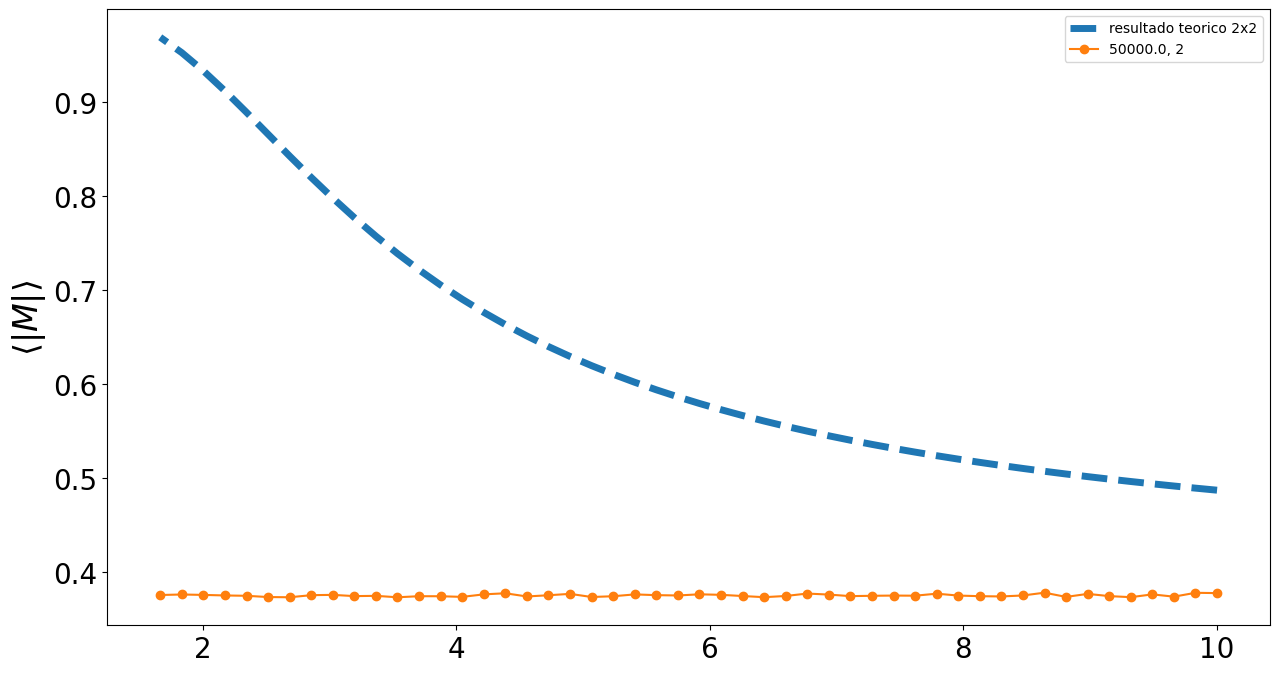

In [12]:
plt.plot(kT, Mmean/2**2,'--', lw = 5, label = 'resultado teorico 2x2')
for N, results_for_N in result.items():
    for Nsteps, thisresult in results_for_N.items():
        plt.plot(kT, thisresult['|M|mean'],'-o', label=f'{Nsteps}, {N}')
plt.ylabel(r'$\langle \|M\| \rangle$')
plt.legend()

50000.0


Text(0, 0.5, '$\\langle E \\rangle$')

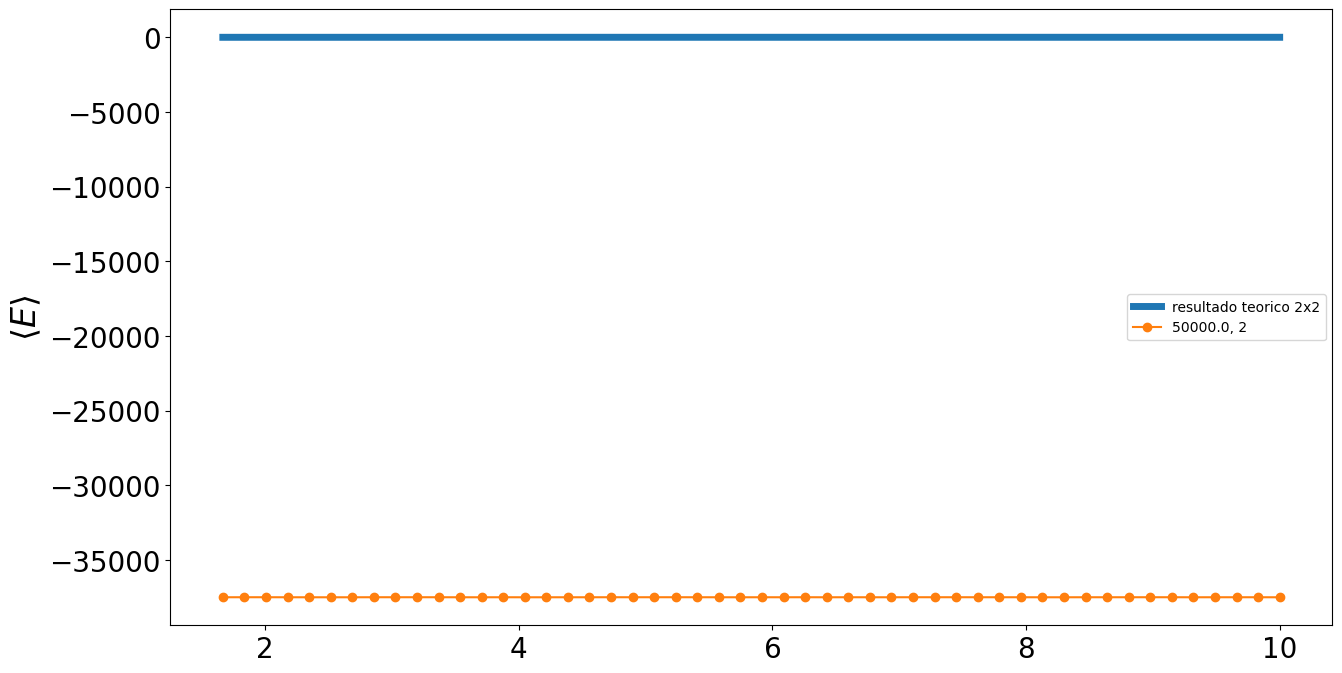

In [13]:
plt.plot(kT, Emean/2**2, lw = 5, label = 'resultado teorico 2x2')
for N, results_for_N in result.items():
    for Nsteps, thisresult in results_for_N.items():
        print (Nsteps)
        plt.plot(kT,thisresult['EMEAN'], '-o', label=f'{Nsteps}, {N}')
plt.legend()
plt.ylabel(r'$\langle E \rangle$')

In [14]:
kT

array([10.        ,  9.82993197,  9.65986395,  9.48979592,  9.31972789,
        9.14965986,  8.97959184,  8.80952381,  8.63945578,  8.46938776,
        8.29931973,  8.1292517 ,  7.95918367,  7.78911565,  7.61904762,
        7.44897959,  7.27891156,  7.10884354,  6.93877551,  6.76870748,
        6.59863946,  6.42857143,  6.2585034 ,  6.08843537,  5.91836735,
        5.74829932,  5.57823129,  5.40816327,  5.23809524,  5.06802721,
        4.89795918,  4.72789116,  4.55782313,  4.3877551 ,  4.21768707,
        4.04761905,  3.87755102,  3.70748299,  3.53741497,  3.36734694,
        3.19727891,  3.02721088,  2.85714286,  2.68707483,  2.5170068 ,
        2.34693878,  2.17687075,  2.00680272,  1.83673469,  1.66666667])

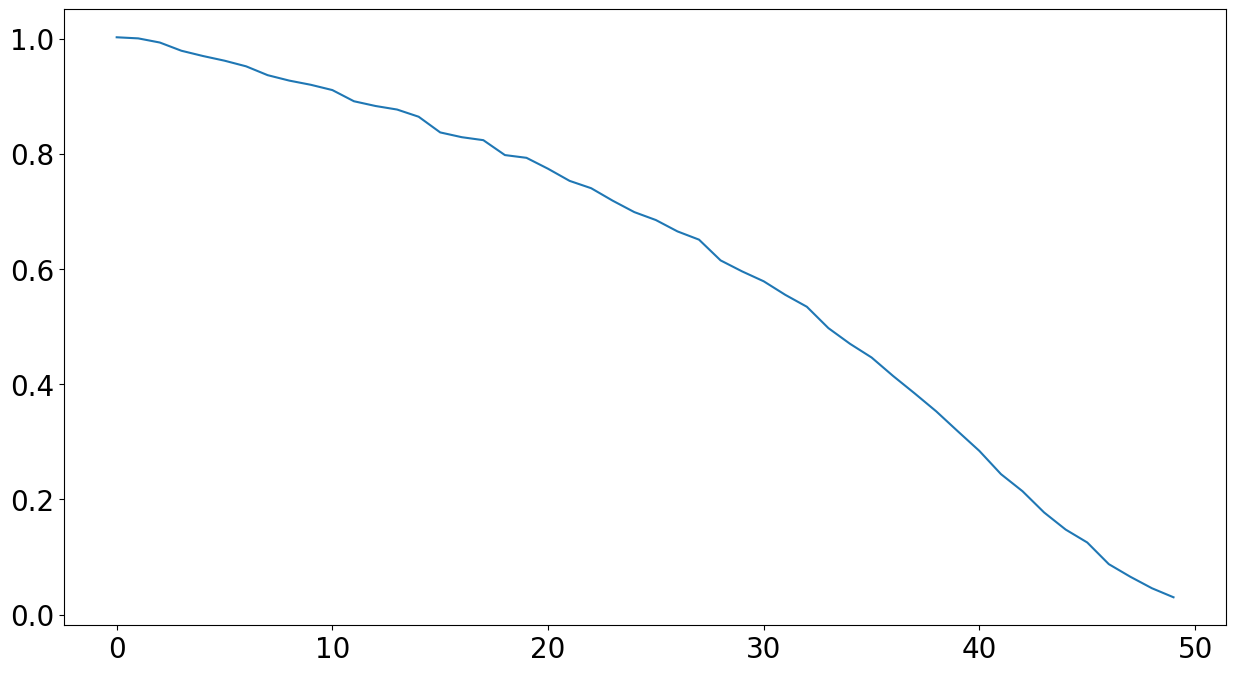

In [36]:
plt.plot(result[2][5e4]['EMEAN']/2**4/1e3)

10000.0
50000.0


Text(0, 0.5, '$\\langle E^2 \\rangle$')

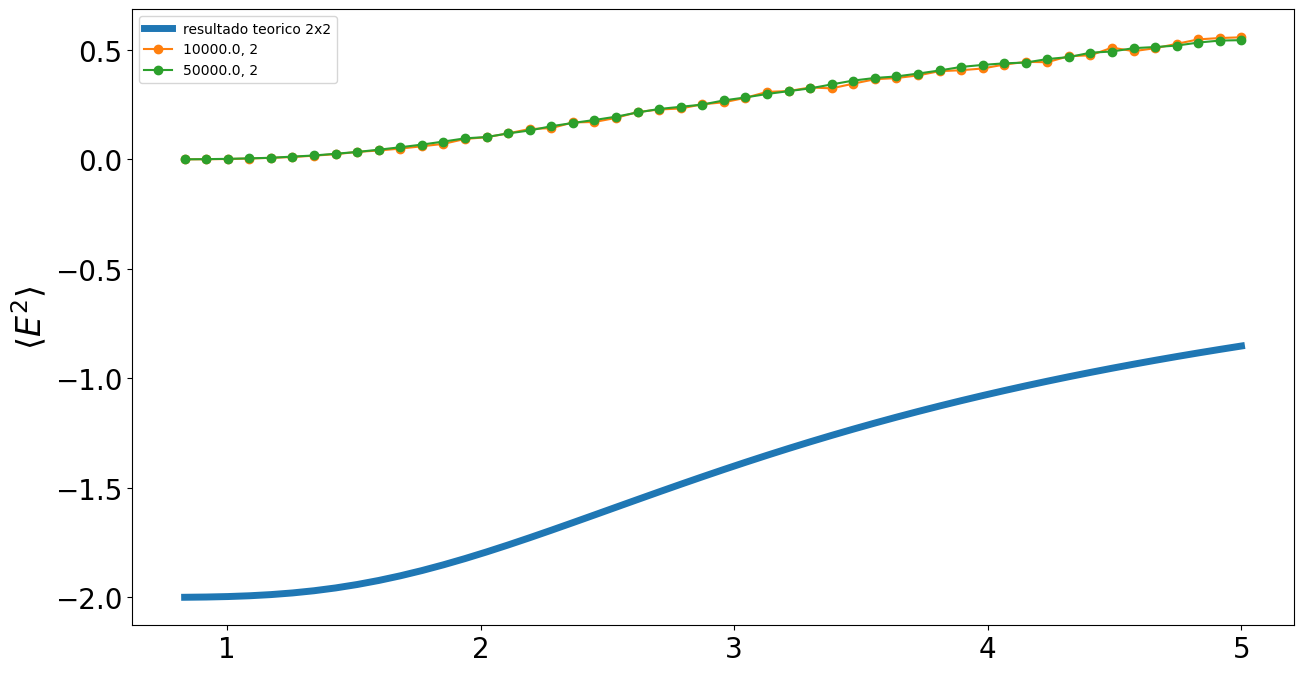

In [14]:
    plt.plot(kT, Emean/2**2, lw = 5, label = 'resultado teorico 2x2')
for N, results_for_N in result.items():
    for Nsteps, thisresult in results_for_N.items():
        print (Nsteps)
        plt.plot(kT,thisresult['E2MEAN']/Nsteps**2, '-o', label=f'{Nsteps}, {N}')
plt.legend()
plt.ylabel(r'$\langle E^2 \rangle$')

Text(0, 0.5, '$\\langle M^2 \\rangle$')

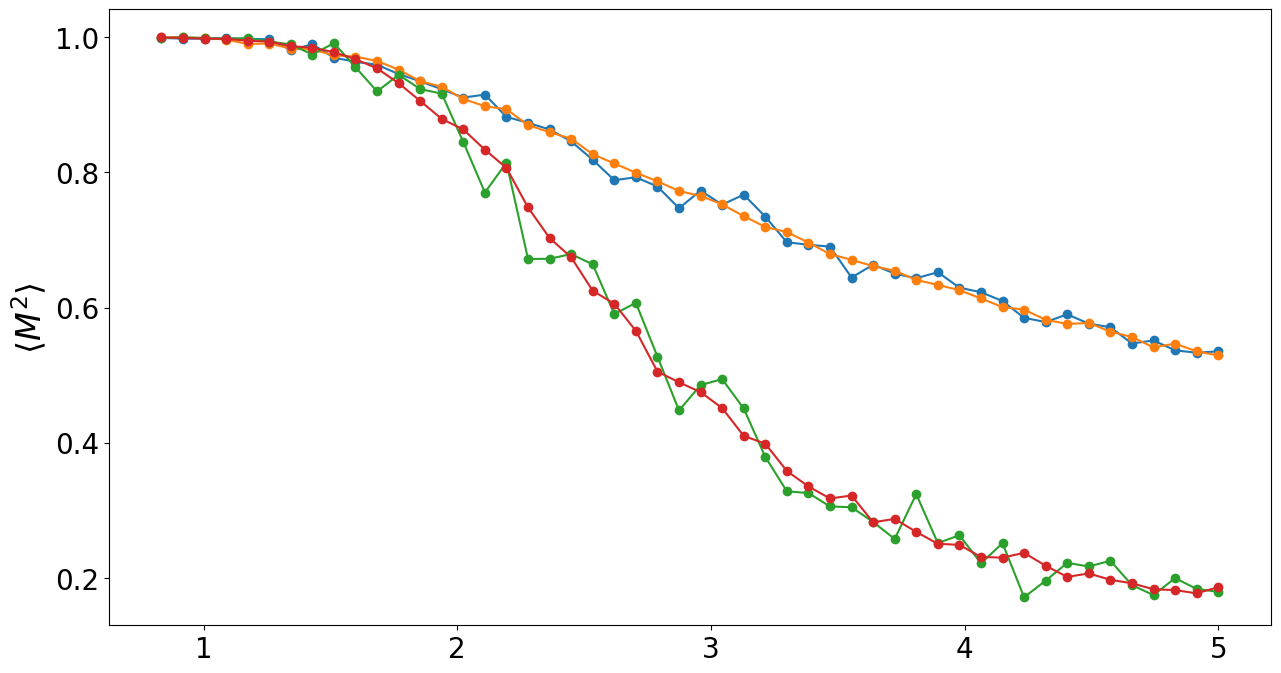

In [14]:
for N, results_for_N in result.items():
    for Nsteps, thisresult in results_for_N.items():
        plt.plot(kT, thisresult['M2MEAN']/N**4,'-o')
plt.ylabel(r'$\langle M^2 \rangle$')

In [15]:
X1 = (result[4][5e4]['M2MEAN']-result[4][5e4]['|M|mean']**2)/kT
X2 = (result[2][5e4]['M2MEAN']-result[2][5e4]['|M|mean']**2)/kT

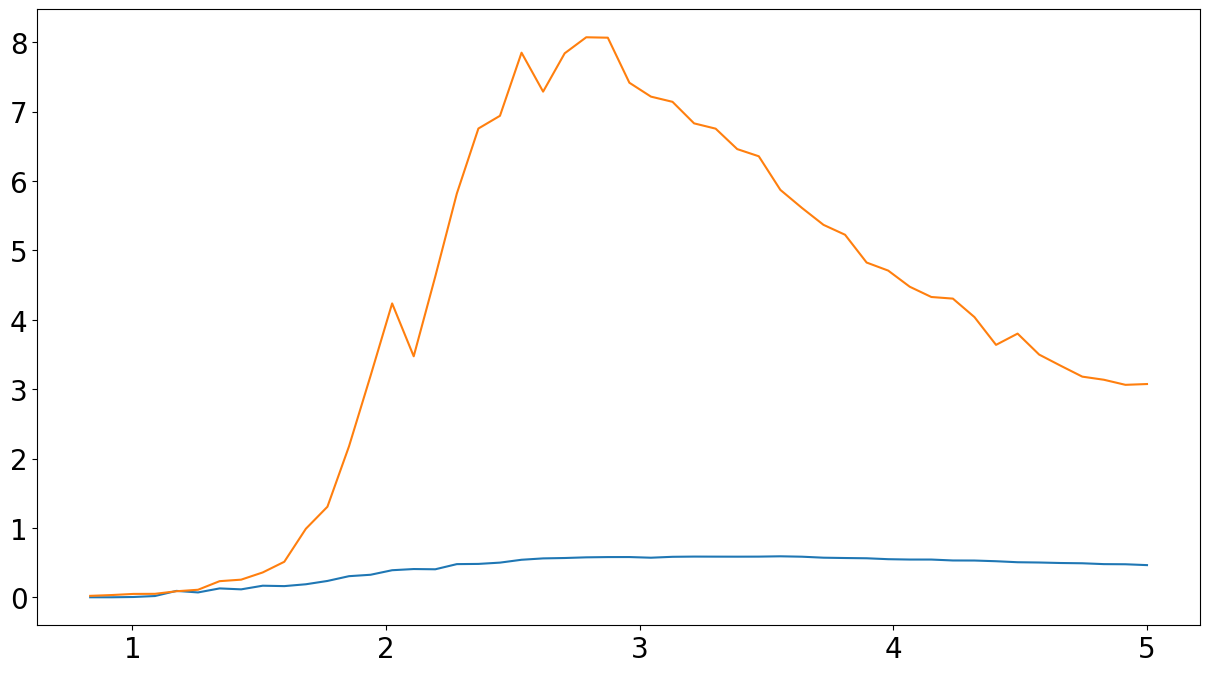

In [16]:
plt.plot(kT, X2)
plt.plot(kT, X1)

In [17]:
CV1 = (result[4][5e4]['E2MEAN'] -result[4][5e4]['EMEAN']**2)/kT**2

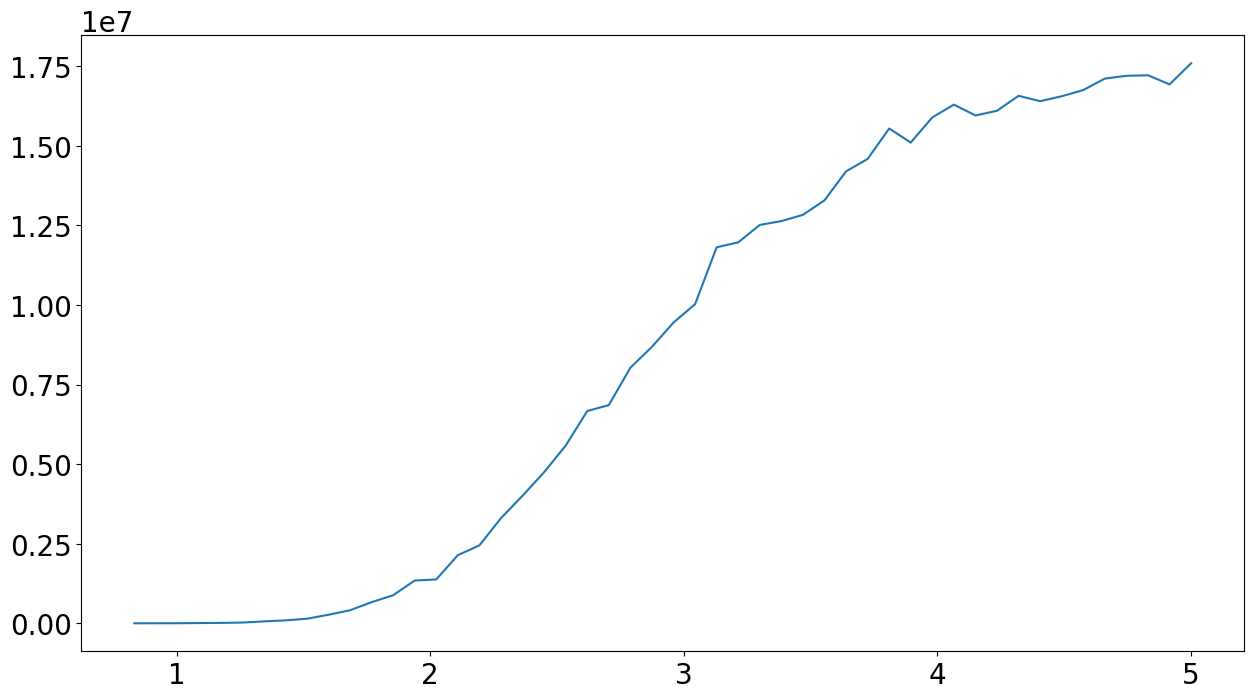

In [18]:
#plt.plot(kT, result[8][1e5]['E2MEAN']/1e5)
plt.plot(kT, CV1)

In [19]:
#plt.plot(kT, (result[8][1e5]['E2MEAN']/kT**2 - result[8][1e5]['EMEAN']**2/kT**2))
plt.plot(kT, result[8][1e5]['CV']/1e5,'o')
#plt.plot(kT, CV1)


KeyError: 8

In [ ]:
plt.plot(CV1)

In [ ]:
plt.plot(kT, result[8][1e5]['E2MEAN'])

In [ ]:
plt.plot(kT, result[8][1e5]['EMEAN']*8**2)
plt.plot(kT, result[4][1e5]['EMEAN']*4**2)

In [ ]:
plt.plot(kT, result[8][1e5]['CV']/kT**2)
plt.plot(kT, result[8][5e4]['CV']/kT**2)
#plt.plot(kT, result[4][1e5]['CV']/kT**2/1e5**2)
#plt.plot(kT, result[4][5e4]['CV']/kT**2/5e4**2)
#plt.plot(kT, result[8][1e5]['CV']/kT**2)

In [ ]:
plt.plot(kT, result[8][1e5]['CV']/kT**2/1e5**2)
plt.plot(kT, result[8][5e4]['CV']/kT**2/5e4**2)
#plt.plot(kT, result[4][1e5]['CV']/kT**2/1e5**2)
#plt.plot(kT, result[4][5e4]['CV']/kT**2/5e4**2)
#plt.plot(kT, result[8][1e5]['CV']/kT**2)